# Relax Challange

## Project Description 


Defining  an  `adopted user`   as  a  user  *who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven­day  period* ,  **identify  which  factors  predict  future  user adoption**.

We  suggest  spending  1­2  hours  on  this,  but  you're  welcome  to  spend  more  or  less. Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better  ­­  no  more than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data you  think  would  be  valuable


## Data description

The  data  is  available  as  two  attached  CSV  files:
- `takehome_user_engagement. csv`
- `takehome_users.csv`

The  data  has  the  following  two  tables:
The  data  has  the  following  two  tables:

1. A  user  table  ( "takehome_users" )  with  data  on  12,000  users  who  signed  up  for  the product  in  the  last  two  years. This  table  includes:
     - `name`:  the  user's  name
     - `object_id`:   the  user's  id
     - `email`:  email  address
     - `creation_source`:   how  their  account  was  created.  This  takes  on  one of  5  values:
        - `PERSONAL_PROJECTS`:  invited  to  join  another  user's personal  workspace
        - `GUEST_INVITE`:  invited  to  an  organization  as  a  guest (limited  permissions)
        - `ORG_INVITE`:  invited  to  an  organization  (as  a  full  member)
        - `SIGNUP`:  signed  up  via  the  website
        - `SIGNUP_GOOGLE_AUTH`:  signed  up  using  Google Authentication  (using  a  Google  email  account  for  their  loginid)
    - `creation_time`:  when  they  created  their  account
    - `last_session_creation_time`:   unix  timestamp  of  last  login
    - `opted_in_to_mailing_list`:  whether  they  have  opted  into  receiving marketing  emails
    - `enabled_for_marketing_drip`:  whether  they  are  on  the  regular marketing  email  drip
    - `org_id`:   the  organization  (group  of  users)  they  belong  to
    - `nvited_by_user_id`:   which  user  invited  them  to  join  (if  applicable).
    
<b></b>
    
2. A  usage  summary  table  ( "takehome_user_engagement" )  that  has  a  row  for  each  day that  a  user  logged  into  the  product.


# 1. Problem Definition

The task is to identify factors that predict future user adoption, defining an adopted user as one who has logged into the product on three separate days in at least one seven-day period. The instruction is to provide a brief writeup of the findings, along with any relevant summary tables, graphs, code, or queries, and to note any factors considered or investigations done, even if they did not lead to a result. Further research or valuable data can also be identified.

# 2. Data Collection

## Installations 

In [12]:
'''Install required packages'''
#!pip install ppscore
#!pip install pycaret==2.3.4
#!pip install chardet

'''Install compatibale vesion of scikit-learn'''
#!pip install -U scikit-learn
#!pip install scikit-learn==0.23.2

'Install compatibale vesion of scikit-learn'

## Import Libraries

In [13]:
#Fundamental libraries
import numpy as np 
import pandas as pd 

#Plot libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Missing data vizualization libraries
import missingno as msno
#import ppscore as pps

# read data
import os 
import json


## Utility Functions

In [14]:
def json_url_to_df (url):
    '''Read json url to df'''

    import urllib.request

    response = urllib.request.urlopen(url)
    data = response.read().decode()
    json_data = json.loads(data)

    df = pd.DataFrame(json_data)

    return df

In [15]:
def json_file_to_df(directory, file_name):
  
    '''Read json url to df'''
    # Change directory one step back and save as the root directory
    root_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
    print(root_dir)

    # Define the location of data directory
    path = root_dir + '\\data\\'

    # Set the file name
    json_data = path + 'ultimate_data_challenge.json'

    #Read JSON file into a dataframe: df
    df = pd.DataFrame(json_data)

    return df

In [16]:
def csv_url_to_df(url):
    '''Read csv file from url to df'''
    import requests
    import chardet

    response = requests.get(url)
    encoding = chardet.detect(response.content)['encoding']
    df = pd.read_csv(url, encoding=encoding)

    return df

## Read Data

In [17]:
## Read json url to df
#url = "https://raw.githubusercontent.com/faridjn/Springboard/master/Unit%2027%20-%20Interview%20Challanges/1.%20ultimate_challenge/data/ultimate_data_challenge.json"
#df = json_url_to_df(url)

In [18]:
## Read json file to df
#directory = '\\data\\'
#file_name = 'ultimate_data_challenge.json'
#df = json_file_to_df(directory, file_name)

In [19]:
#Read csv from url to df
url_1 = 'https://raw.githubusercontent.com/faridjn/Springboard/master/Unit%2027%20-%20Interview%20Challanges/2.%20relax_challenge/Data/takehome_user_engagement.csv'
url_2 = 'https://raw.githubusercontent.com/faridjn/Springboard/master/Unit%2027%20-%20Interview%20Challanges/2.%20relax_challenge/Data/takehome_users.csv'

df_1 = csv_url_to_df(url_1)
df_2 = csv_url_to_df(url_2)

# 3. Data Wrangling

## Utility functions

In [20]:
def describe_dataframe(df):
    print('Describe non-numeric columns:')
    display(df.describe(include = ['O', 'bool']).round(2).T)
    
    print('\nDescribe numeric columns:')
    display(df.describe().round(2).T)
    
    return None

In [21]:
#Missing data helper function
def count_missing(df):
    ''' Count the number of missing values .isnull() in each column well as the percentages 
    Call pd.concat() to form a single table df with 'count' and '%' columns'''
    
    print('\nMissing data stasts')
    missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    missing.columns=['count', '%']
    missing = missing.loc[missing['count'] > 0]
    missing.sort_values(by='count', inplace = True, ascending = False)
    
    return missing

## Data inspection and exploration

In [22]:
#Check size of the dataframe
print(df_1.shape)

#Check size of the dataframe
print(df_2.shape)

(207917, 3)
(12000, 10)


In [24]:
#Display top 10 rows of the df
display('df_1', df_1.head(10))
print('')
display('df_2', df_2.head(3).T)

'df_1'

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


'df_2'

,0,1,2
object_id,1,2,3
creation_time,2014-04-22 03:53:30,2013-11-15 03:45:04,2013-03-19 23:14:52
name,Clausen August,Poole Matthew,Bottrill Mitchell
email,AugustCClausen@yahoo.com,MatthewPoole@gustr.com,MitchellBottrill@gustr.com
creation_source,GUEST_INVITE,ORG_INVITE,ORG_INVITE
last_session_creation_time,1398138810.0,1396237504.0,1363734892.0
opted_in_to_mailing_list,1,0,0
enabled_for_marketing_drip,0,0,0
org_id,11,1,94
invited_by_user_id,10803.0,316.0,1525.0


In [26]:
print('df_1', df_1.info(), '\n\n')
print('df_2', df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB
df_1 None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  


In [27]:
#describe_dataframe(df_1)

In [28]:
#describe_dataframe(df_2)

In [62]:
#Number of unique users
df_1['user_id'].nunique()

8823

In [82]:
# Unique objects and number of unique objects
print_unique = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']
count_unique = ['object_id', 'name', 'email', 'invited_by_user_id']

In [85]:
for col in count_unique:
    print(col, ':', df_2[col].nunique())

object_id : 12000
name : 11355
email : 11980
invited_by_user_id : 2565


In [89]:
for col in print_unique:
    print(col, ':', list(df_2[col].unique()))

creation_source : ['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS', 'SIGNUP_GOOGLE_AUTH']
opted_in_to_mailing_list : [1, 0]
enabled_for_marketing_drip : [0, 1]


## Data cleaning and formatting

In [29]:
# Set datetime formt used in the dataset
datetime_format = '%Y-%m-%d %H:%M:%S'

#Change `date_columns` coluumn data type to `datetime`
df_1['time_stamp'] = pd.to_datetime(df_1['time_stamp'], format=datetime_format, errors="raise")
df_2['creation_time'] = pd.to_datetime(df_2['creation_time'], format=datetime_format, errors="raise")
df_2['last_session_creation_time'] = pd.to_datetime(df_2['last_session_creation_time'], unit='s')

In [37]:
# Replace NaN values with a default value, e.g. -1
df_2['invited_by_user_id'].fillna(-1, inplace=True)

# Convert float column A to integer type
df_2['invited_by_user_id'] = df_2['invited_by_user_id'].astype(int)

In [41]:
df_1.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [42]:
df_2.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                     int32
dtype: object

## Handling of missing data

In [43]:
# missing data stats
count_missing(df_1)


Missing data stasts


,count,%


In [44]:
# missing data stats
count_missing(df_2)


Missing data stasts


,count,%
last_session_creation_time,3177,26.475


In [45]:
# Replace NaN values with a default value, e.g. -1
df_2['last_session_creation_time'].fillna(-1, inplace=True)

In [46]:
# missing data stats
count_missing(df_2)


Missing data stasts


,count,%


## Feature engineering

8823

In [ ]:
#Replace True False for ultimate_black_user with 1 and 0
df ['ultimate_black_user'] =  df['ultimate_black_user'].replace({True: 1, False: 0})

In [ ]:
#Get the last date in data
last_date = (max(df['last_trip_date']))

# Define cut off date as 30 days before that date
threshold_date = last_date - pd.Timedelta(days=30)

# create the 'active' column based on the 'date' column and the threshold date
df['active'] = (df['last_trip_date'] > threshold_date).astype(bool)

In [ ]:
# add a new column to calculate how many days since sign-up
df['since_signup_date'] = -1 * (df['signup_date'] - pd.to_datetime(last_date)).dt.days

#drop signup date and last_trip_date
df.drop('signup_date', axis=1, inplace=True)
df.drop('last_trip_date', axis=1, inplace=True)

In [ ]:
retention_rate = 100 * df['active'].sum()/len(df)
print(f'Driver retention rate is {retention_rate:0.2f}%')

Driver retention rate is 36.62%


In [ ]:
df_1hat = pd.get_dummies(df) 

In [ ]:
df_1hat.head(10).T

,0,1,2,3,4,5,6,7,8,9
trips_in_first_30_days,4,0,3,9,14,2,1,2,2,1
avg_rating_of_driver,4.7,5.0,4.3,4.6,4.4,3.5,4.9,5.0,4.5,4.9
avg_surge,1.1,1.0,1.0,1.14,1.19,1.0,1.0,1.0,1.0,1.0
surge_pct,15.4,0.0,0.0,20.0,11.8,0.0,0.0,0.0,0.0,0.0
ultimate_black_user,1,0,0,1,0,1,0,0,0,0
weekday_pct,46.2,50.0,100.0,80.0,82.4,100.0,100.0,100.0,100.0,0.0
avg_dist,3.67,8.26,0.77,2.36,3.13,10.56,3.95,2.04,4.36,2.37
avg_rating_by_driver,5.0,5.0,5.0,4.9,4.9,5.0,4.0,5.0,5.0,5.0
active,True,False,False,True,False,True,False,False,False,False
since_signup_date,157,153,176,172,155,173,158,154,161,179


# 4. Exploratory Data Analysis (EDA):

Define Categorical vs numerica features

In [ ]:
#Define categrical and numerical data
num_columns = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_rating_by_driver',
             'avg_surge', 'surge_pct', 'weekday_pct',  'avg_dist',  
             'since_signup_date']

#Seperate categorical data
cat_columns = ['city_Astapor', "city_King's Landing", 'city_Winterfell',  'ultimate_black_user']

## Categorical Features

### Stats

In [ ]:
#create a pivot table for categorical columns
dfg_cat = pd.DataFrame(df_1hat.groupby('active')[cat_columns].sum()).reset_index()
display(dfg_cat)

# metlt the pivot table to plotable features
dfg_cat_melt = pd.melt(dfg_cat, id_vars = ['active'], var_name='Feature', value_name = 'Count')
display(dfg_cat_melt)

,active,city_Astapor,city_King's Landing,city_Winterfell,ultimate_black_user
0,False,12512.0,3823.0,15355.0,9495
1,True,4022.0,6307.0,7981.0,9359


,active,Feature,Count
0,False,city_Astapor,12512.0
1,True,city_Astapor,4022.0
2,False,city_King's Landing,3823.0
3,True,city_King's Landing,6307.0
4,False,city_Winterfell,15355.0
5,True,city_Winterfell,7981.0
6,False,ultimate_black_user,9495.0
7,True,ultimate_black_user,9359.0


### Plots

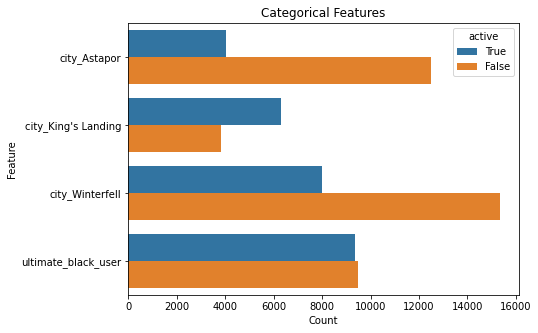

In [ ]:
# Set the hue for the 'active' column
hue_order = [True, False]

#Plot the `dfg_melt`
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data=dfg_cat_melt, y='Feature', x='Count', hue = 'active', hue_order=hue_order)
plt.title('Categorical Features')
plt.show()

## Numerical Features

### Stats

In [ ]:
#seperate active and disactive
df_active_num = df_1hat[num_columns].loc[df_1hat['active'] == 1]
df_disactive_num = df_1hat[num_columns].loc[~df_1hat['active'] == 1]

In [ ]:
#Calcualte stats 
#Active 
df_active_describe= df_active_num.describe().loc[['count', 'mean', 'std']].T
df_active_describe['cv'] = df_active_describe['std']/df_active_describe['mean']
df_active_describe['active'] = 1

#Disactive
df_disactive_describe= df_disactive_num.describe().loc[['count', 'mean', 'std']].T
df_disactive_describe['cv'] = df_disactive_describe['std']/df_disactive_describe['mean']
df_disactive_describe['active'] = 0

In [ ]:
#Concat stat tables
df_num_describe = pd.concat([df_active_describe,df_disactive_describe],axis = 0)

display(df_num_describe)

,count,mean,std,cv,active
trips_in_first_30_days,18310.0,3.349590,5.020615,1.498874,1
avg_rating_of_driver,18310.0,4.619623,0.521711,0.112934,1
avg_rating_by_driver,18310.0,4.763375,0.324318,0.068086,1
avg_surge,18310.0,1.073720,0.163183,0.151979,1
surge_pct,18310.0,9.128165,15.489344,1.696874,1
weekday_pct,18310.0,62.214604,29.068319,0.467227,1
avg_dist,18310.0,5.118977,4.627946,0.904076,1
since_signup_date,18310.0,165.692245,8.878553,0.053585,1
trips_in_first_30_days,31690.0,1.659167,2.661903,1.604361,0
avg_rating_of_driver,31690.0,4.667611,0.603863,0.129373,0


### Plots

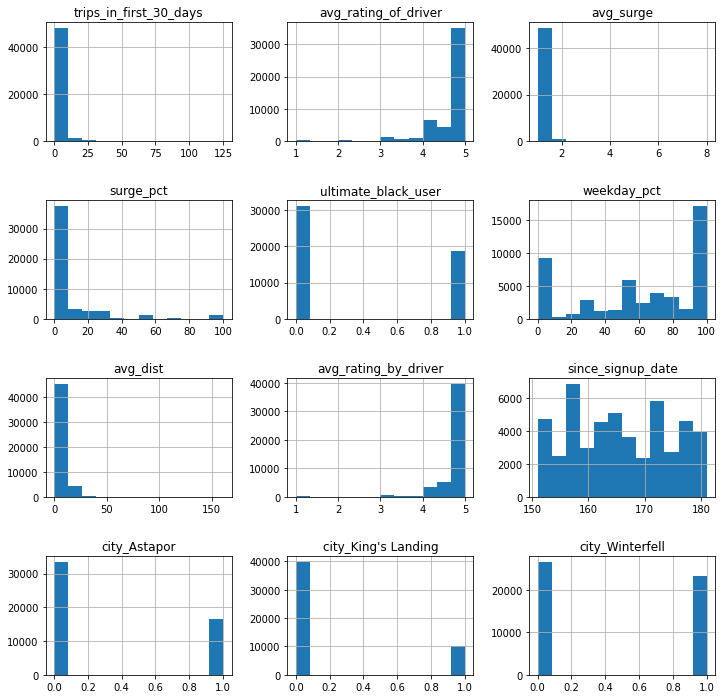

In [ ]:
#Plot histogram of all features
df_1hat.hist(figsize=(12,12), bins = 12)
plt.subplots_adjust(hspace=0.5)

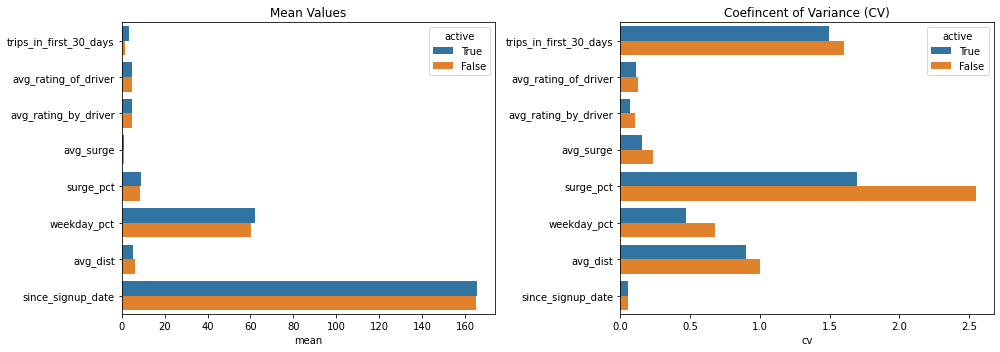

In [ ]:
# Set the hue for the 'active' column
hue_order = [True, False]

#Plot the stats
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

#plot mean values
sns.barplot(data = df_num_describe,
            y = df_num_describe.index,
            x = 'mean',
            hue = 'active',
            hue_order = hue_order,
            ax=axes[0])
axes[0].set_title('Mean Values')

#plot cv values
sns.barplot(data = df_num_describe,
            y = df_num_describe.index,
            x = 'cv',
            hue = 'active',
            hue_order = hue_order,
            ax=axes[1])
axes[1].set_title('Coefincent of Variance (CV)')

plt.tight_layout()
plt.show()

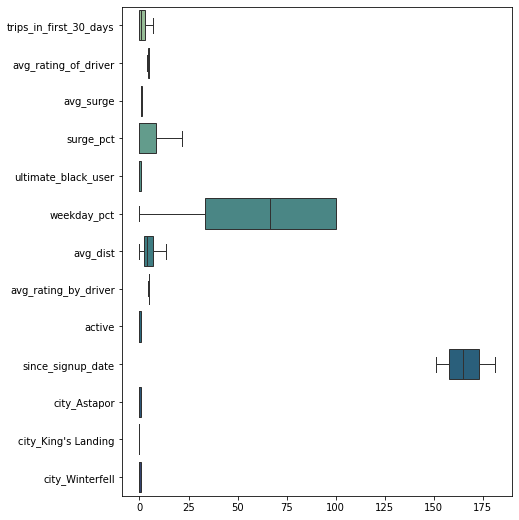

In [ ]:
fig, ax = plt.subplots(figsize=(7,9))

sns.boxplot(data = df_1hat,
            orient = 'h',
            width=0.8,
            palette='crest',
            linewidth= 1,
            sym = '')
plt.show()

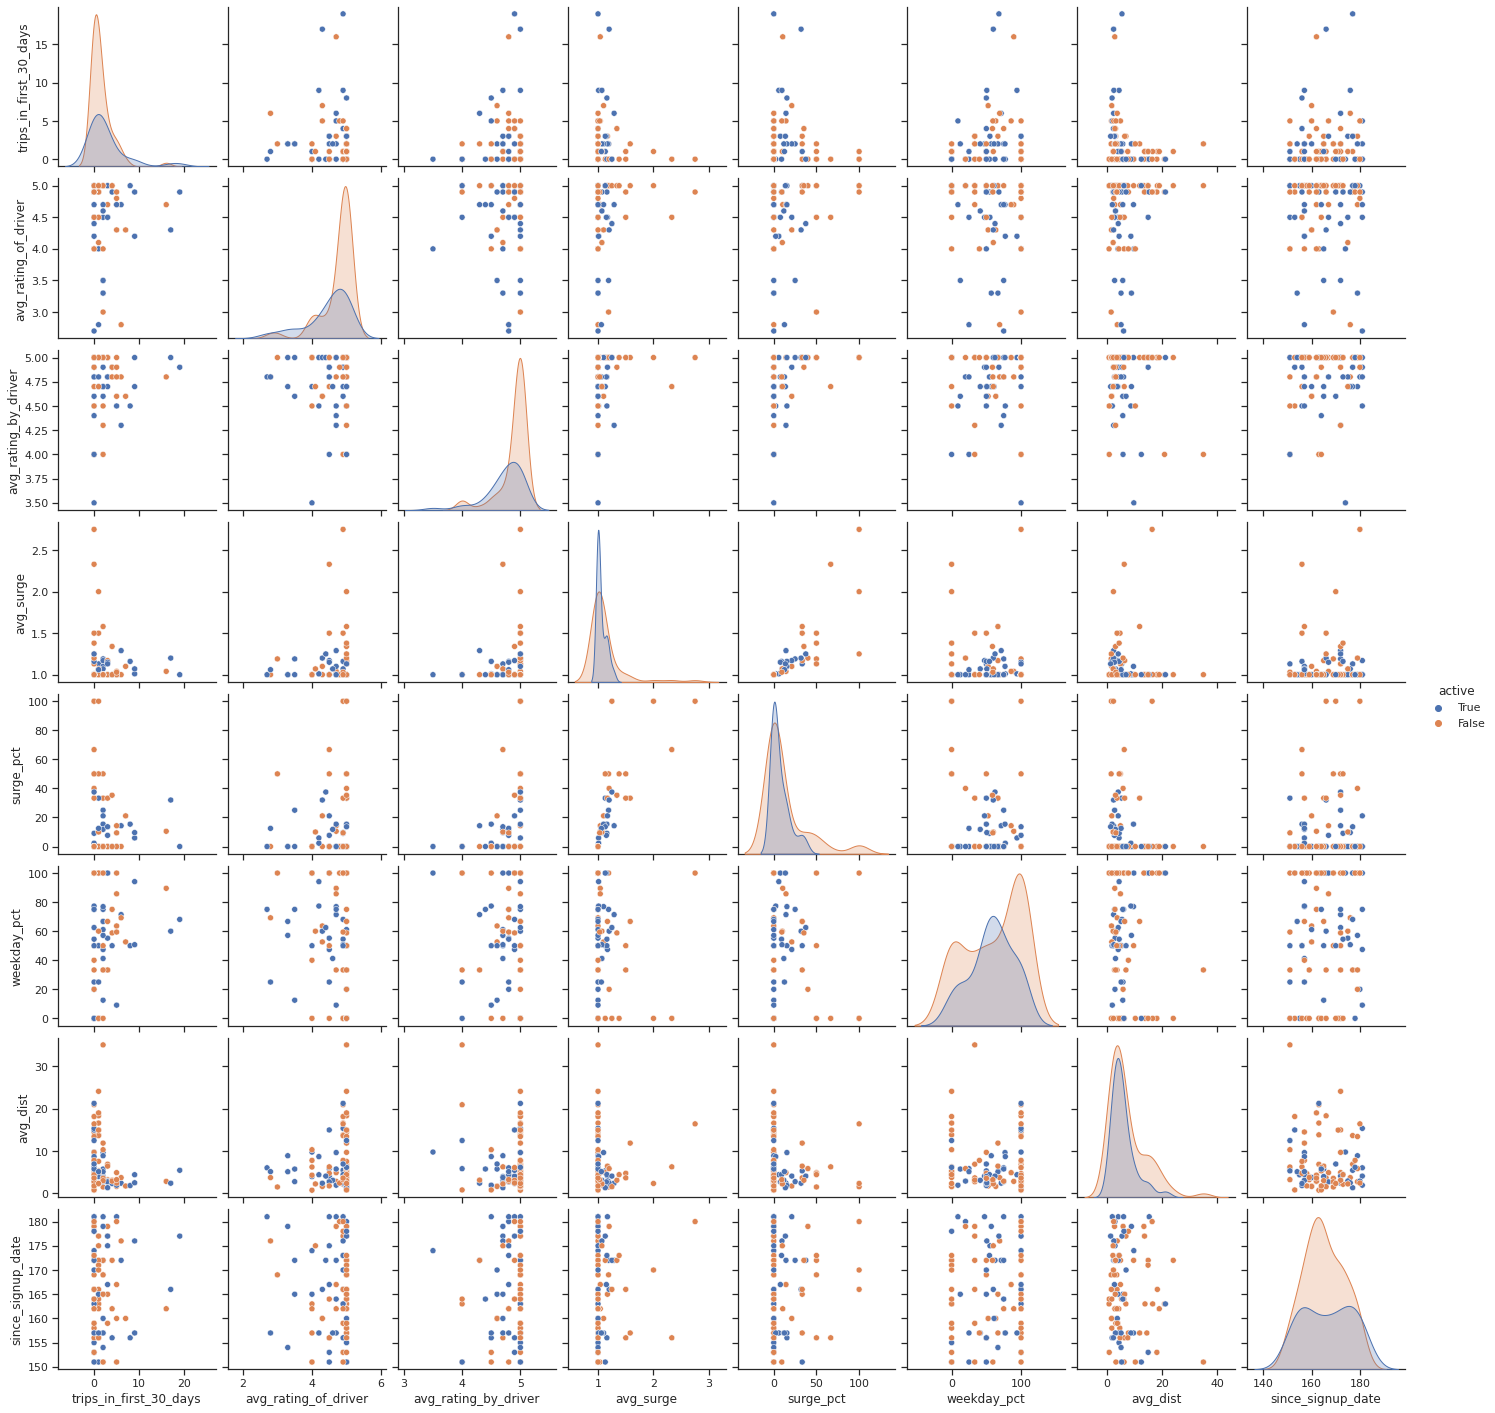

In [ ]:
df_plot = df_1hat.sample(100)

# Set the style of the plots
sns.set(style="ticks", color_codes=True)

# Set the hue for the 'active' column
hue_order = [True, False]

# Plot histograms of numerical columns
g = sns.pairplot(df_plot, diag_kind="kde", hue='active', vars = num_columns, hue_order=hue_order)
plt.show()

## Multivariate Analysis

In [ ]:
def plot_corr_matrix (df, round_vals, mask = True):
    '''This function plots Correlation matrix'''
    
    # Compute the correlation matrix
    corr = df.corr()
        
    # Generate a mask for the upper triangle
    if mask:
        mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr.round(round_vals), mask=mask, cmap='coolwarm', vmin = -1, vmax=1, center=0, annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Pearson Correlation Matrix')

    plt.show()

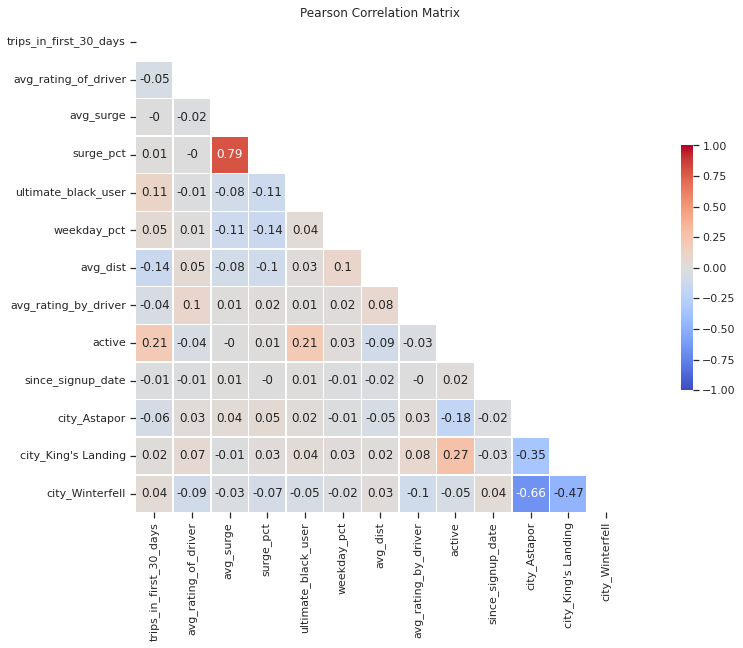

In [ ]:
#Plot Corr matrix
plot_corr_matrix(df=df_1hat, round_vals=2, mask = True)

In [ ]:
def plot_pps_matrix(df, round_vals=2, mask = True):
    '''This function gets a df and plot PPS score matrix'''
    
    # Compute the PPS matrix
    matrix = pps.matrix(df)

    #Plot PPS
    matrix_pps = matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

    # Generate a mask for the upper triangle
    if mask:
        mask = np.triu(np.ones_like(matrix_pps, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(matrix_pps.round(round_vals), mask = mask, cmap="Blues", vmin = 0, vmax=1, center=0.5,
                square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5}).set(title='PPS Matrix')
    plt.show()


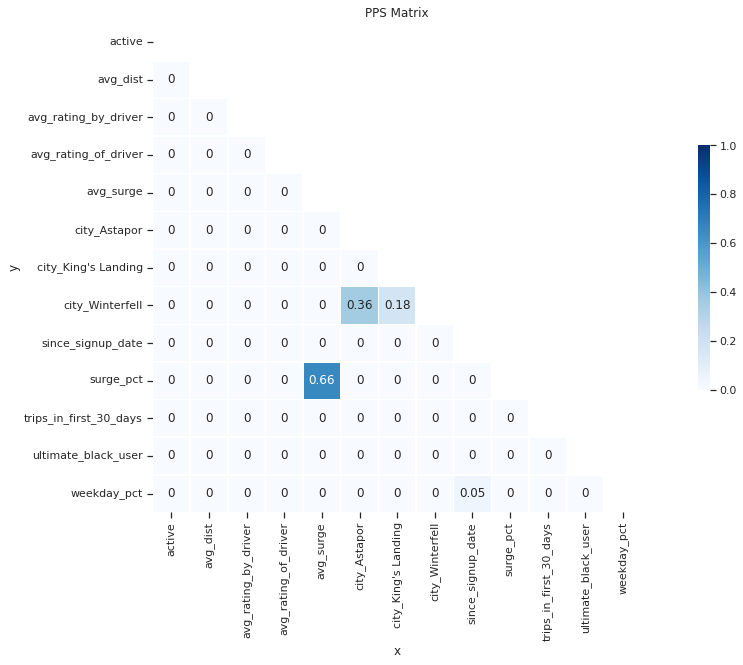

In [ ]:
    #Plot PPS
plot_pps_matrix(df=df_1hat, round_vals=2, mask=True)

# 5. Model Building

## Import PyCaret libraries

In [ ]:
from pycaret.classification import *

# check version
from pycaret.utils import version
version()

'2.3.4'

## Initialize Setup

In [ ]:
#set pointer to df_1hat
data = df_1hat
data.head().T

,0,1,2,3,4
trips_in_first_30_days,4,0,3,9,14
avg_rating_of_driver,4.7,5.0,4.3,4.6,4.4
avg_surge,1.1,1.0,1.0,1.14,1.19
surge_pct,15.4,0.0,0.0,20.0,11.8
ultimate_black_user,1,0,0,1,0
weekday_pct,46.2,50.0,100.0,80.0,82.4
avg_dist,3.67,8.26,0.77,2.36,3.13
avg_rating_by_driver,5.0,5.0,5.0,4.9,4.9
active,True,False,False,True,False
since_signup_date,157,153,176,172,155


In [ ]:
#Setup Pycaret Regression session
#Transform dataset, normalize and split the dataset.
#Log experiments and plots for experiments to be viewed later with MLflow. 

clf1 = setup(data=data,
             target = 'active',
             session_id=123,
             log_experiment=True,
             transformation=True,
             train_size=0.7,
             categorical_features= cat_columns,
             log_plots=True)

,Description,Value
0,session_id,123
1,Target,active
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(50000, 13)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
  File "/usr/local/lib/python3.8/dist-packages/pycaret/internal/tabular.py", line 1702, in setup
    mlflow.create_experiment(exp_name_log)
  File "/usr/local/lib/python3.8/dist-packages/mlflow/tracking/fluent.py", line 1214, in create_experiment
    return MlflowClient().create_experiment(name, artifact_location, tags)
  File "/usr/local/lib/python3.8/dist-packages/mlflow/tracking/client.py", line 501, in create_experiment
    return self._tracking_client.create_experiment(name, artifact_location, tags)
  File "/usr/local/lib/python3.8/dist-packages/mlflow/tracking/_tracking_service/client.py", line 234, in create_experiment
    return self.store.create_experiment(
  File "/usr/local/lib/python3.8/dist-packages/mlflow/store/tracking/file_store.py", line 362, in create_experiment
    self._validate_experiment_does_not_exist(name)
  File "/usr/local/lib/python3.8/dist-packages/mlflow/store/tracking/file_store.py", line 354, in _validate_experiment_


## Compare Models

In [ ]:
best_model = compare_models()

INFO:logs:Initializing compare_models()
INFO:logs:compare_models(include=None, fold=None, round=4, cross_validation=True, sort=Accuracy, n_select=1, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, verbose=True, display=None, exclude=None)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=74)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:10:48
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7737,0.8341,0.6160,0.7226,0.6650,0.4958,0.4994,0.846
rf,Random Forest Classifier,0.7508,0.8122,0.6417,0.6638,0.6525,0.4583,0.4585,3.744
knn,K Neighbors Classifier,0.7466,0.7914,0.6173,0.6642,0.6398,0.4448,0.4455,0.792
lr,Logistic Regression,0.7412,0.7806,0.5198,0.6938,0.5943,0.4100,0.4192,0.393
ridge,Ridge Classifier,0.7405,0.0000,0.5064,0.6992,0.5873,0.4051,0.4164,0.042
nb,Naive Bayes,0.7301,0.7860,0.6270,0.6308,0.6289,0.4169,0.4169,0.060
svm,SVM - Linear Kernel,0.7294,0.0000,0.4743,0.6900,0.5601,0.3746,0.3895,0.262
dt,Decision Tree Classifier,0.6991,0.6743,0.5817,0.5885,0.5850,0.3491,0.3491,0.244
qda,Quadratic Discriminant Analysis,0.5060,0.5119,0.5335,0.2276,0.3149,0.0206,0.0238,0.080


INFO:logs:Initializing Logistic Regression
INFO:logs:Total runtime is 2.7247269948323567e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lr, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, add_to_model_list=True, display=<pycaret.internal.Display.Display object at 0x7fc11178cf70>, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Logistic Regression Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating met

In [ ]:
models()

In [ ]:
models(type='ensemble').index.tolist()

## Hyper-parameterization

## Ensemble Model

## Evalute models

# 6. Model Deployment

# 7. Communication of Results